In [9]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [10]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [11]:
X_train,X_test,y_train,y_test = train_test_split(df[iris.feature_names], df['target'], test_size = 0.20, random_state = 42)

Model Fitting Using cross_val_score

In [12]:
max_depth = [3,5,10,100000]
number_of_trees = [5,10,50,150,200]
acc_cross = []
times = []
for i in max_depth:
    for j in number_of_trees:
        clf_cross = RandomForestClassifier(max_depth = i, n_estimators = j, random_state = 42)
        t0 = time.process_time()
        scores = cross_val_score(clf_cross,X_train,y_train, cv =10)
        t1 = time.process_time()
        acc_cross.append(scores.mean())
        times.append(t1 - t0)

In [13]:
acc_cross = np.reshape(acc_cross,(4,5))
times = np.reshape(times,(4,5))
for i in range(len(max_depth)):
    for j in range (len(number_of_trees)):
        print("For " + str(max_depth[i]) + "depth and " + str(number_of_trees[j]) + " accuracy is " + str(acc_cross[i][j]) + " in " + str(times[i][j]) + " seconds")

For 3depth and 5 accuracy is 0.9248834498834497 in 0.234375 seconds
For 3depth and 10 accuracy is 0.9332167832167831 in 0.25 seconds
For 3depth and 50 accuracy is 0.9415501165501163 in 0.921875 seconds
For 3depth and 150 accuracy is 0.9415501165501163 in 2.5 seconds
For 3depth and 200 accuracy is 0.9415501165501163 in 3.09375 seconds
For 5depth and 5 accuracy is 0.9248834498834497 in 0.140625 seconds
For 5depth and 10 accuracy is 0.9248834498834497 in 0.21875 seconds
For 5depth and 50 accuracy is 0.9415501165501163 in 0.921875 seconds
For 5depth and 150 accuracy is 0.9332167832167831 in 2.40625 seconds
For 5depth and 200 accuracy is 0.9332167832167831 in 3.140625 seconds
For 10depth and 5 accuracy is 0.9248834498834497 in 0.296875 seconds
For 10depth and 10 accuracy is 0.9248834498834497 in 0.421875 seconds
For 10depth and 50 accuracy is 0.9332167832167831 in 0.796875 seconds
For 10depth and 150 accuracy is 0.9248834498834497 in 2.265625 seconds
For 10depth and 200 accuracy is 0.933216

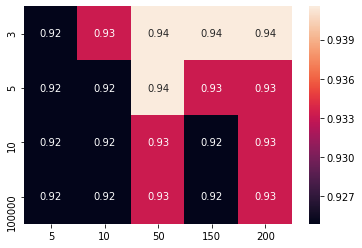

In [14]:
sns.heatmap(acc_cross, xticklabels = number_of_trees, yticklabels = max_depth ,annot = True)

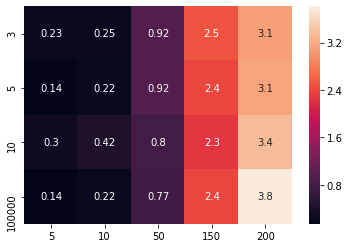

In [15]:
sns.heatmap(times, xticklabels = number_of_trees, yticklabels = max_depth ,annot = True)